In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from mdp_module import MDP, run_simulation


In [2]:
# General Parameters
T=10
n_trajectories=200


In [3]:
# Parameters for example 1
num_states   = 3
num_actions  = 2
s0           = 0
P = np.zeros((num_states, num_actions, num_states))
P[0,0] = [0.7,0.3,0.0]
P[0,1] = [0.0,0.4,0.6]
P[1,0] = [0.8,0.0,0.2]
P[1,1] = [0.0,0.5,0.5]
P[2,:,2] = 1.0

R = np.zeros((num_states, num_actions))
R[0,0], R[0,1] = 5.0, 1.0
R[1,0], R[1,1] = 2.0, -1.0
R[2,0], R[2,1] = 3.0, 0
pi_b = np.array([[0.3,0.7],[0.8,0.2],[0.1,0.9]])
pi_e = np.array([[0.5,0.5],[0.0,1.0],[0.0,1.0]])

mdp = MDP(num_states, num_actions, T, s0, P, R, pi_b, pi_e)


In [4]:
# Simulate and get data
eif_vals, term_vals = run_simulation(mdp, n_trajectories, seed=42)


True rho^{pi^e}: 3.5407
Average EIF: 0.0465
Estimated rho^{pi^e}: 3.5871


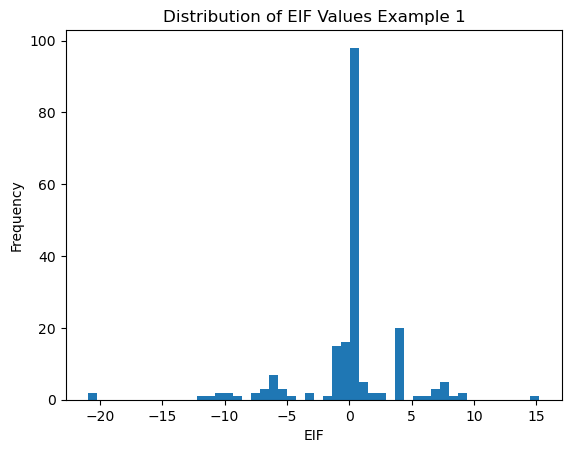

In [5]:
# Histogram of EIF values
plt.hist(eif_vals, bins=50)
plt.title("Distribution of EIF Values Example 1")
plt.xlabel("EIF")
plt.ylabel("Frequency")
plt.show()


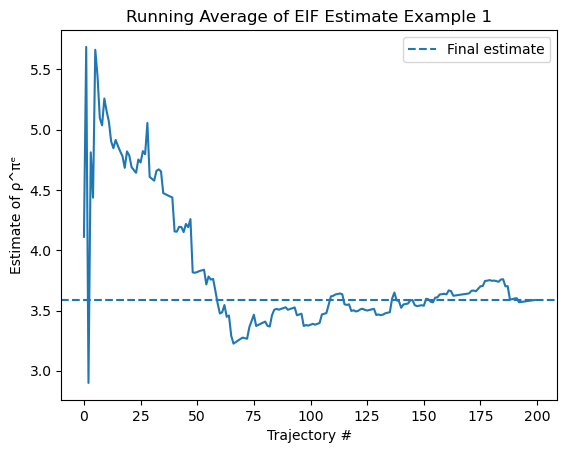

In [6]:
# Running average of EIF values
running_avg = np.cumsum(term_vals) / np.arange(1, len(term_vals)+1)
plt.plot(running_avg)
plt.axhline(y=np.mean(term_vals), linestyle='--', label='Final estimate')
plt.title("Running Average of EIF Estimate Example 1")
plt.xlabel("Trajectory #")
plt.ylabel("Estimate of ρ^πᵉ")
plt.legend()
plt.show()


In [7]:
## Example of non zero EIF

True rho^{pi^e}: 3.7865
Average EIF: 0.0390
Estimated rho^{pi^e}: 3.8255


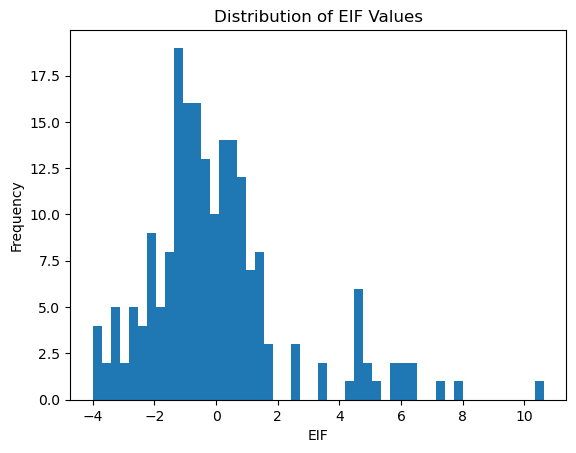

In [8]:
num_states   = 3
num_actions  = 2
s0           = 0
P = np.zeros((num_states, num_actions, num_states))
P[0, 0] = [0.6, 0.4, 0.0]  # s=0, a=0
P[0, 1] = [0.0, 0.3, 0.7]  # s=0, a=1
P[1, 0] = [0.5, 0.0, 0.5]  # s=1, a=0
P[1, 1] = [0.0, 0.8, 0.2]  # s=1, a=1
P[2, 0] = [0.1, 0.0, 0.9]  # s=2, a=0
P[2, 1] = [0.1, 0.0, 0.9]  # s=2, a=1

R = np.zeros((num_states, num_actions))
R[0,0], R[0,1] = 5.0, 1.0

# Policies
pi_b = np.array([
    [0.7, 0.3],
    [0.6, 0.4],
    [0.8, 0.2]
])
pi_e = np.array([
    [0.2, 0.8],
    [0.3, 0.7],
    [0.4, 0.6]
])

mdp2 = MDP(num_states, num_actions, T, s0, P, R, pi_b, pi_e)

# Simulate and get data
eif_vals_2, term_vals_2 = run_simulation(mdp2, n_trajectories, seed=42)

# Histogram of EIF values
plt.hist(eif_vals_2, bins=50)
plt.title("Distribution of EIF Values")
plt.xlabel("EIF")
plt.ylabel("Frequency")
plt.show()

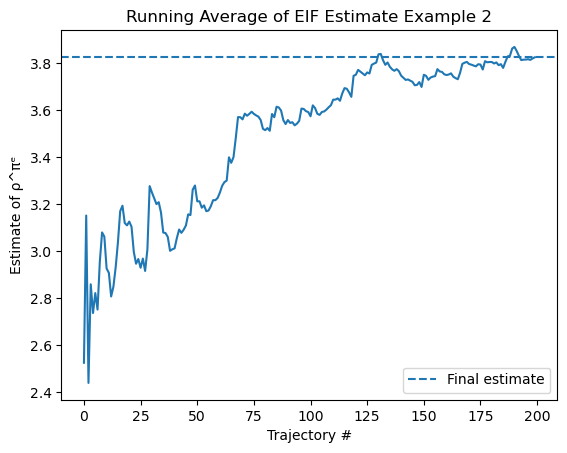

In [9]:
# Running average of EIF values
running_avg = np.cumsum(term_vals_2) / np.arange(1, len(term_vals_2)+1)
plt.plot(running_avg)
plt.axhline(y=np.mean(term_vals_2), linestyle='--', label='Final estimate')
plt.title("Running Average of EIF Estimate Example 2")
plt.xlabel("Trajectory #")
plt.ylabel("Estimate of ρ^πᵉ")
plt.legend()
plt.show()


True rho^{pi^e}: 3.7865
Average EIF: 0.0390
Estimated rho^{pi^e}: 3.8255


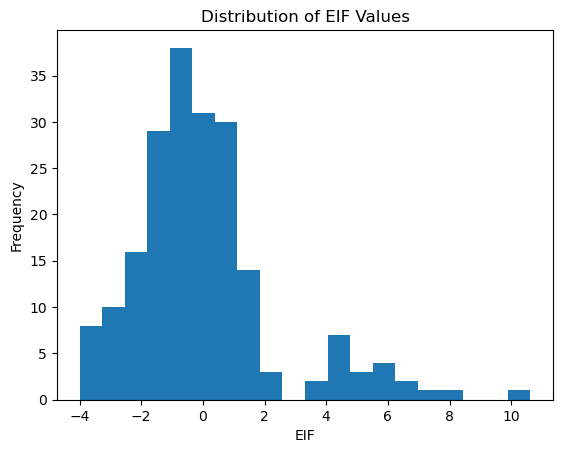

In [10]:
# Another example of previous file 
# Transition matrix // this transition matrix is just an indication of the possible state change after taking some action. 
P = np.zeros((num_states, num_actions, num_states))
P[0, 0, 0] = 1.0  # s=0, a=0 -> s'=0
P[0, 1, 1] = 1.0  # s=0, a=1 -> s'=1
P[1, 0, 0] = 1.0  # s=0, a=0 -> s'=0  
P[1, 1, 2] = 1.0   # s=1, a=1 -> s'=2
P[2, : ,2] =1.0 # s=2, any a -> s'=2

P[0, 0] = [0.7, 0.3, 0.0]
P[0, 1] = [0.0, 0.4, 0.6]
P[1, 0] = [0.8, 0.0, 0.2]
P[1, 1] = [0.0, 0.5, 0.5]
P[2, :, 2] = 1.0

# Reward matrix
R = np.zeros((num_states, num_actions))
R[0, 1] = 1.0  # s=0, a=1 -> r=1
R[0, 0] = 5.0  # s=0, a=0 -> r=5

# Policies
pi_b = np.array([
    [0.3, 0.7],
    [0.8, 0.2],
    [0.1, 0.9]
])

pi_e = np.array([
    [0.5, 0.5],
    [0, 1],
    [0, 1]
])

mdp3 = MDP(num_states, num_actions, T, s0, P, R, pi_b, pi_e)
# Simulate and get data# Simulate and get data
eif_vals_3, term_vals_3 = run_simulation(mdp2, n_trajectories, seed=42)

# Histogram of EIF values
plt.hist(eif_vals_3, bins=20)
plt.title("Distribution of EIF Values")
plt.xlabel("EIF")
plt.ylabel("Frequency")
plt.show()

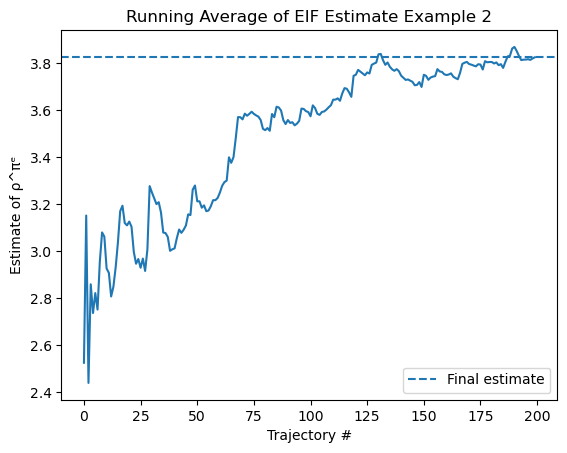

In [11]:
# Running average of EIF values
running_avg = np.cumsum(term_vals_3) / np.arange(1, len(term_vals_3)+1)
plt.plot(running_avg)
plt.axhline(y=np.mean(term_vals_3), linestyle='--', label='Final estimate')
plt.title("Running Average of EIF Estimate Example 2")
plt.xlabel("Trajectory #")
plt.ylabel("Estimate of ρ^πᵉ")
plt.legend()
plt.show()